# Introduction :

Car accidents are issues found across the globe to be severe and dangerous. Accidents might sometimes due to natural reasons or to our negligence or other reasons. A Road Traffic Accident according to Garber (2010) is a random event involving a road user that results into property damage, death or injury. Road Traffic Accidents(RTA) have become not just a National but a Global issue. It is on records that Road traffic accidents cause an estimated 13 million deaths and 20-50 million disabilities worldwide annually with 85% of injury related deaths occurring in developing countries. According to WHO (2007), RTA injuries accounted for 23% of all injury deaths worldwide. This project discusses the severity of car accidents citing City of Seattle.

# Business Problems:

Determining the causes of Road Traffic accidents
Prediction of Road Traffic accidents
Determining the effects and severity of Road Traffic Accidents
This project is useful to the Road Safety Corporation and stakeholders interested in the welfare and safety of road users.

# Data Section:

The dataset used in this project directly comes from the Seattle Data on Transportation. It contains data from car crashes from 2004 till date. The dataset comes with a pdf file containing a clear definition for each of the available features. The data for this project is secondarily sourced from https://data.seattle.gov/browse?q=vehicle+accidents , https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

We have several attributes in our dataset which tell us about the severity of these accidents.attributes like WEATHER, ROADCOND, LIGHTCOND, JUNCTIONTYPE can tell us about the accidents which happen naturally.And attributes like SEVERITYDESC and COLLISIONTYPE help us decide how these accidents take place. Our predictor or target variable will be 'SEVERITYCODE' because it is used measure the severity of an accident from 0 to 5 within the dataset. Attributes used to weigh the severity of an accident are 'WEATHER'(Weather Condition), 'ROADCOND'(Road Condition) and 'LIGHTCOND'(Light Condition).

0 - Little to no Probability (Clear Weather Conditions) 1 - Very Low Probability - Chance or Property Damage 2 - Low Probability - Chance of Injury 3 - Mild Probability - Chance of Serious Injury 4 - High Probability - Chance of Fatality

# Methodology Used:

Most of the features in the dataset of this project are categorical. In this project Machine Learning Algorithm is used in car collisions and severity recognition.

Graphs are plotted for various car collissions and severity recognition


In [36]:
# Imports and initial setup given below
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style


from sklearn import preprocessing

In [2]:
# import the data file required for the processing
path="https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"
df=pd.read_csv(path)

In [3]:
df.shape

(221144, 40)

In [4]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
# Removal of all Non Relevant Features
data=df[["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INJURIES", "SERIOUSINJURIES", "FATALITIES", "ADDRTYPE", "COLLISIONTYPE", "INCDATE", "INATTENTIONIND", "UNDERINFL", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR", "WEATHER", "ROADCOND", "LIGHTCOND"]]

In [6]:
display(data.shape)

(221144, 19)

In [7]:
data.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,ADDRTYPE,COLLISIONTYPE,INCDATE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,WEATHER,ROADCOND,LIGHTCOND
0,0,0,0,0,0,0,0,0,Block,NaN,2004/11/10 00:00:00+00,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
1,0,0,0,0,0,0,0,0,NaN,NaN,2010/04/07 00:00:00+00,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
2,1,2,0,0,2,0,0,0,Block,Left Turn,2013/04/02 00:00:00+00,NaN,N,NaN,NaN,N,Overcast,Dry,Daylight
3,1,2,0,0,2,0,0,0,Block,Parked Car,2007/03/06 00:00:00+00,NaN,0,NaN,NaN,N,Clear,Dry,Other
4,1,2,0,0,2,0,0,0,Block,Rear Ended,2006/05/17 00:00:00+00,Y,0,NaN,NaN,N,Clear,Dry,Daylight


In [8]:
li=["PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INJURIES", "SERIOUSINJURIES", "FATALITIES"]
dTot=data[li].sum(axis=0)

In [9]:
data[li].loc

In [10]:
data["INCDATE"]=data["INCDATE"].str[:10]
data[["YEAR", "MONTH", "DAY"]]=data["INCDATE"].str.split("/", expand=True)
data.drop("INCDATE", axis=1, inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [11]:
data.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,ADDRTYPE,COLLISIONTYPE,...,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,WEATHER,ROADCOND,LIGHTCOND,YEAR,MONTH,DAY
0,0,0,0,0,0,0,0,0,Block,NaN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,2004,11,10
1,0,0,0,0,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,2010,04,07
2,1,2,0,0,2,0,0,0,Block,Left Turn,...,N,NaN,NaN,N,Overcast,Dry,Daylight,2013,04,02
3,1,2,0,0,2,0,0,0,Block,Parked Car,...,0,NaN,NaN,N,Clear,Dry,Other,2007,03,06
4,1,2,0,0,2,0,0,0,Block,Rear Ended,...,0,NaN,NaN,N,Clear,Dry,Daylight,2006,05,17


In [12]:
# Convert Date from str to int type
data=data.astype({"UNDERINFL":str, "YEAR":int, "MONTH":int, "DAY":int})
data["UNDERINFL"].value_counts()

N      103455
0       81676
nan     26384
Y        5399
1        4230
Name: UNDERINFL, dtype: int64

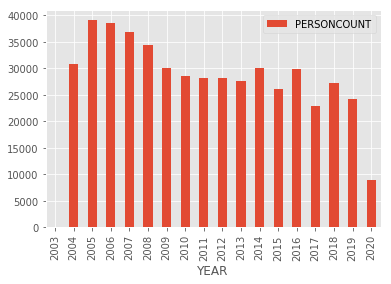

In [13]:
data[["YEAR", "PERSONCOUNT"]].groupby("YEAR").sum().plot(kind="bar")

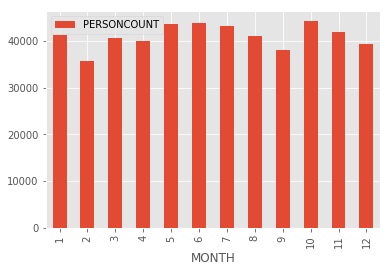

In [14]:
data[["MONTH", "PERSONCOUNT"]].groupby("MONTH").sum().plot(kind="bar")

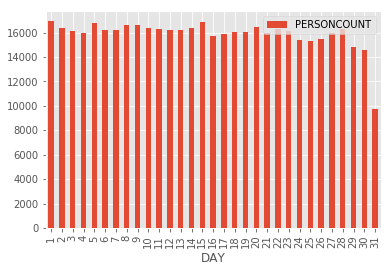

In [15]:
data[["DAY", "PERSONCOUNT"]].groupby("DAY").sum().plot(kind="bar")

In [16]:
data["PERSONCOUNT"].sum()

492368

In [17]:
data.groupby("SEVERITYCODE").sum()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,YEAR,MONTH,DAY
SEVERITYCODE,,,,,,,,,,
0,4125,0,0,0,0,0,0,43501891,144674,334622
1,320015,725,685,267319,0,0,0,276359268,897631,2145817
2,159204,6575,4890,109735,77983,0,0,117997015,385267,915036
2b,7981,979,433,4861,4402,3249,0,6226415,20229,48561
3,1041,150,28,502,288,103,372,701928,2421,5503


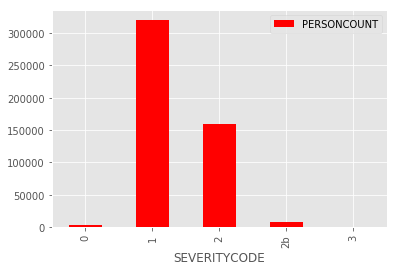

In [18]:
data[["SEVERITYCODE", "PERSONCOUNT"]].groupby("SEVERITYCODE").sum().plot(kind="bar", color="red")

The predictions based on the features that are not directly related with the collissions

In [20]:
data_new=df[["SEVERITYCODE", "ADDRTYPE", "COLLISIONTYPE", "INATTENTIONIND", "UNDERINFL", "WEATHER", "ROADCOND", "LIGHTCOND", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR"]]
data_new.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,0,Block,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1,Block,Left Turn,NaN,N,Overcast,Dry,Daylight,NaN,NaN,N
3,1,Block,Parked Car,NaN,0,Clear,Dry,Other,NaN,NaN,N
4,1,Block,Rear Ended,Y,0,Clear,Dry,Daylight,NaN,NaN,N


In Relation with Address type

In [21]:
data_new["ADDRTYPE"].count()

217432

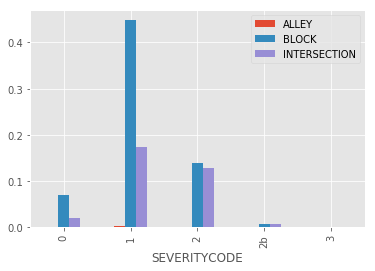

In [22]:
addrtype=pd.get_dummies(pd.DataFrame(data_new["ADDRTYPE"]))/data_new["ADDRTYPE"].count()

addrtype.columns =["ALLEY", "BLOCK", "INTERSECTION"]
addrtype
data_new=pd.concat([data_new, addrtype], axis=1)
data_new.drop("ADDRTYPE", axis=1, inplace=True)
data_new[["SEVERITYCODE", "ALLEY", "BLOCK", "INTERSECTION"]].groupby("SEVERITYCODE").sum().plot(kind="bar")

In Relation with the SPEEDING

In [23]:
data_new["SPEEDING"].value_counts()

Y    9912
Name: SPEEDING, dtype: int64

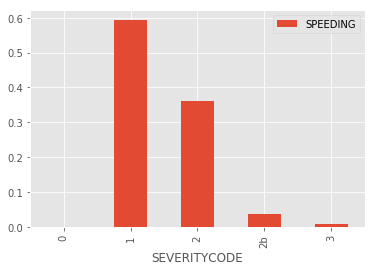

In [24]:
(data_new[["SEVERITYCODE", "SPEEDING"]].groupby("SEVERITYCODE").count()/data_new["SPEEDING"].count()).plot(kind="bar")

In Relation with the Under Influence Category

In [25]:
data_new["UNDERINFL"].value_counts()

N    103455
0     81676
Y      5399
1      4230
Name: UNDERINFL, dtype: int64

In [26]:
data_new["UNDERINFL"]=data_new["UNDERINFL"].replace(["1","0"], ["Y","N"])
data_new["UNDERINFL"].value_counts()

N    185131
Y      9629
Name: UNDERINFL, dtype: int64

In [27]:
dtt=data_new["SEVERITYCODE"]
dff=pd.get_dummies(data_new["UNDERINFL"])/data_new["UNDERINFL"].count()
dgg=pd.concat([dtt,dff], axis=1)

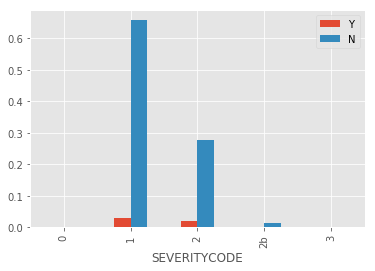

In [28]:
dgg[["SEVERITYCODE", "Y", "N"]].groupby("SEVERITYCODE").sum().plot(kind="bar")

In Relation with INATTENTION INDICATOR

In [29]:
data_new["INATTENTIONIND"].value_counts()

Y    30188
Name: INATTENTIONIND, dtype: int64

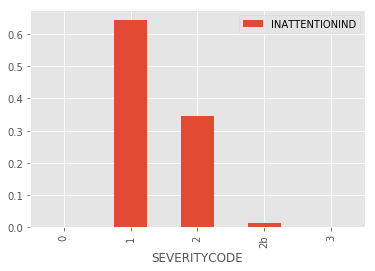

In [30]:
(data_new[["SEVERITYCODE", "INATTENTIONIND"]].groupby("SEVERITYCODE").count()/data_new["INATTENTIONIND"].count()).plot(kind="bar")

In Relation with PEDROWNOTGRNT

In [31]:
data_new["PEDROWNOTGRNT"].value_counts()

Y    5188
Name: PEDROWNOTGRNT, dtype: int64

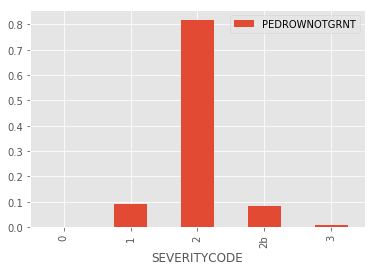

In [32]:
(data_new[["SEVERITYCODE", "PEDROWNOTGRNT"]].groupby("SEVERITYCODE").count()/data_new["PEDROWNOTGRNT"].count()).plot(kind="bar")

IN Relation with the HITPARKEDCAR

In [34]:
data_new["HITPARKEDCAR"].value_counts()

N    209193
Y     11951
Name: HITPARKEDCAR, dtype: int64

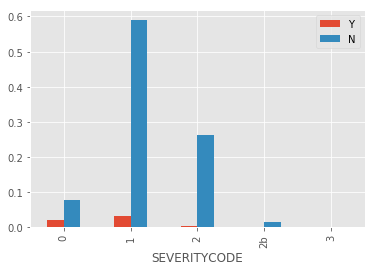

In [37]:
dtt=data_new["SEVERITYCODE"]
dff=pd.get_dummies(data_new["HITPARKEDCAR"])/data_new["HITPARKEDCAR"].count()
dgg=pd.concat([dtt,dff], axis=1)
dgg[["SEVERITYCODE", "Y", "N"]].groupby("SEVERITYCODE").sum().plot(kind="bar")

In Relation with the COLLISIONTYPE and plot given below

In [38]:
data_new["COLLISIONTYPE"].value_counts()

Parked Car    48451
Angles        35460
Rear Ended    34622
Other         24524
Sideswipe     18853
Left Turn     14080
Pedestrian     7653
Cycles         5909
Right Turn     3007
Head On        2181
Name: COLLISIONTYPE, dtype: int64

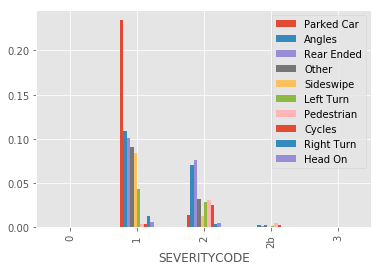

In [39]:
dtt=data_new["SEVERITYCODE"]
dff=pd.get_dummies(data_new["COLLISIONTYPE"])/data_new["COLLISIONTYPE"].count()
dgg=pd.concat([dtt,dff], axis=1)
dgg[["SEVERITYCODE", "Parked Car", "Angles", "Rear Ended", "Other", "Sideswipe", "Left Turn", "Pedestrian", "Cycles", "Right Turn", "Head On"]].groupby("SEVERITYCODE").sum().plot(kind="bar")

In Relation with the PEDCOUNT and PEDCYLCOUNT

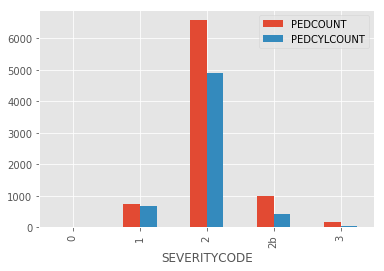

In [40]:
data[["SEVERITYCODE", "PEDCOUNT", "PEDCYLCOUNT"]].groupby("SEVERITYCODE").sum().plot(kind="bar")

In Relation with the Environment

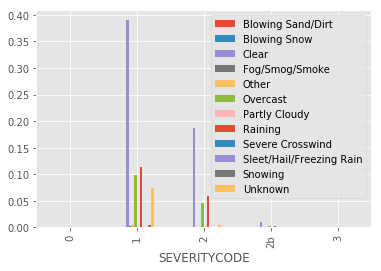

In [41]:
data["WEATHER"].value_counts()
dtt=data_new["SEVERITYCODE"]
dff=pd.get_dummies(data_new["WEATHER"])/data_new["WEATHER"].count()
dgg=pd.concat([dtt,dff], axis=1)
dgg[:].groupby("SEVERITYCODE").sum().plot(kind="bar")

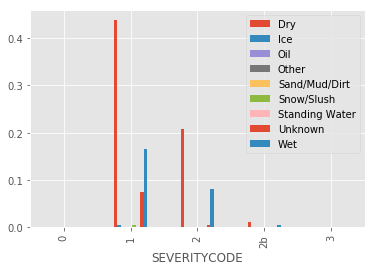

In [42]:
data["ROADCOND"].value_counts()
dtt=data_new["SEVERITYCODE"]
dff=pd.get_dummies(data_new["ROADCOND"])/data_new["ROADCOND"].count()
dgg=pd.concat([dtt,dff], axis=1)
dgg[:].groupby("SEVERITYCODE").sum().plot(kind="bar")

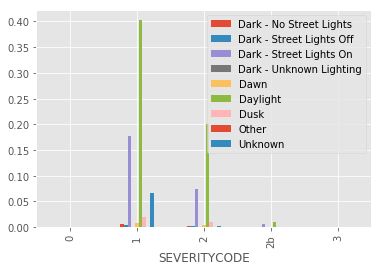

In [43]:
data["LIGHTCOND"].value_counts()
dtt=data_new["SEVERITYCODE"]
dff=pd.get_dummies(data_new["LIGHTCOND"])/data_new["LIGHTCOND"].count()
dgg=pd.concat([dtt,dff], axis=1)
dgg[:].groupby("SEVERITYCODE").sum().plot(kind="bar")

# The below shows the Last Data sets

In [44]:
data=df[["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INJURIES", "SERIOUSINJURIES", "FATALITIES", "INATTENTIONIND", "UNDERINFL", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR", "ADDRTYPE", "COLLISIONTYPE", "INCDATE", "WEATHER", "ROADCOND", "LIGHTCOND"]]
#Split the Date
data["INCDATE"]=data["INCDATE"].str[:10]
data[["YEAR", "MONTH", "DAY"]]=data["INCDATE"].str.split("/", expand=True)
data.drop("INCDATE", axis=1, inplace=True)

#Replace N and Y for 0 and 1 UNDERINFL
data["UNDERINFL"]=data["UNDERINFL"].replace(["Y","N","1","0"], [1,0,1,0])
data["HITPARKEDCAR"]=data["HITPARKEDCAR"].replace(["Y","N"], [1,0])
data["SPEEDING"]=data["SPEEDING"].replace(["Y","N"], [1,0])
data["INATTENTIONIND"]=data["INATTENTIONIND"].replace(["Y","N"], [1,0])
data["PEDROWNOTGRNT"]=data["PEDROWNOTGRNT"].replace(["Y","N"], [1,0])

data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INATTENTIONIND,UNDERINFL,...,SPEEDING,HITPARKEDCAR,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,YEAR,MONTH,DAY
0,0,0,0,0,0,0,0,0,NaN,NaN,...,NaN,0,Block,NaN,NaN,NaN,NaN,2004,11,10
1,0,0,0,0,0,0,0,0,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,2010,04,07
2,1,2,0,0,2,0,0,0,NaN,0.0,...,NaN,0,Block,Left Turn,Overcast,Dry,Daylight,2013,04,02
3,1,2,0,0,2,0,0,0,NaN,0.0,...,NaN,0,Block,Parked Car,Clear,Dry,Other,2007,03,06
4,1,2,0,0,2,0,0,0,1,0.0,...,NaN,0,Block,Rear Ended,Clear,Dry,Daylight,2006,05,17


In [45]:
data_num=data[["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INJURIES", "SERIOUSINJURIES", "FATALITIES", "INATTENTIONIND", "UNDERINFL", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR", "YEAR", "MONTH", "DAY"]]
data_env=data[["SEVERITYCODE","ADDRTYPE", "COLLISIONTYPE", "WEATHER", "ROADCOND", "LIGHTCOND"]]
data_easy=data[["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INJURIES", "SERIOUSINJURIES", "FATALITIES"]]
data_num.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,YEAR,MONTH,DAY
0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,2004,11,10
1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,2010,04,07
2,1,2,0,0,2,0,0,0,NaN,0.0,NaN,NaN,0,2013,04,02
3,1,2,0,0,2,0,0,0,NaN,0.0,NaN,NaN,0,2007,03,06
4,1,2,0,0,2,0,0,0,1,0.0,NaN,NaN,0,2006,05,17


# Conclusion:

Useful machine learning models to predict the severity of car accidents. The most of the algorithms are biased towards most frequent class. However, efficient pre-processing and corresponding imbalanced data techniques should give optimal results.
